In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
train = pd.read_csv("emnist-balanced-train.csv",delimiter = ',')
test = pd.read_csv("emnist-balanced-test.csv", delimiter = ',')
HEIGHT = 28
WIDTH = 28


# Split x and y
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
# Normalise
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255
# number of classes
num_classes = train_y.nunique()
# One hot encoding
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=7)
# Reshape image for CNN
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [3]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu', input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, batch_size=512, verbose=1, validation_data=(val_x, val_y))

Epoch 1/10
199/199 [==============================] - 104s 520ms/step - loss: 1.0690 - accuracy: 0.6955 - val_loss: 0.6284 - val_accuracy: 0.7999
Epoch 2/10
199/199 [==============================] - 105s 528ms/step - loss: 0.5389 - accuracy: 0.8276 - val_loss: 0.5116 - val_accuracy: 0.8352
Epoch 3/10
199/199 [==============================] - 99s 498ms/step - loss: 0.4485 - accuracy: 0.8523 - val_loss: 0.4696 - val_accuracy: 0.8442
Epoch 4/10
199/199 [==============================] - 100s 502ms/step - loss: 0.4017 - accuracy: 0.8647 - val_loss: 0.4434 - val_accuracy: 0.8492
Epoch 5/10
199/199 [==============================] - 106s 531ms/step - loss: 0.3679 - accuracy: 0.8734 - val_loss: 0.4319 - val_accuracy: 0.8513
Epoch 6/10
199/199 [==============================] - 101s 508ms/step - loss: 0.3426 - accuracy: 0.8817 - val_loss: 0.4181 - val_accuracy: 0.8574
Epoch 7/10
199/199 [==============================] - 99s 495ms/step - loss: 0.3174 - accuracy: 0.8893 - val_loss: 0.4091 - v

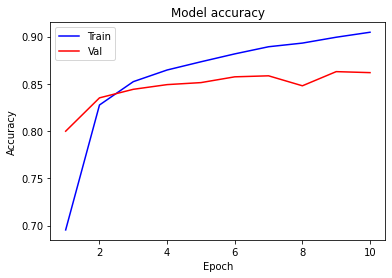

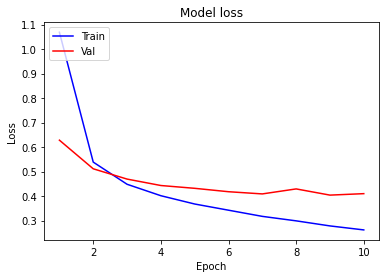

Test loss: 0.43146830797195435
Test accuracy: 0.8615351915359497


In [4]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc, type):
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    if (type == "Accuracy"):
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
    else:
        plt.title('Model loss')
        plt.ylabel('Loss')
    plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plotgraph(epochs, acc, val_acc, "Accuracy")
# loss curve
plotgraph(epochs, loss, val_loss, "Loss")
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])